# Fun with Charts
Learn how to present data better with charts. Also, matplotlib should allow for some better charts than excel. Also good chance for me to learn and play around with pandas and matplotlib.

In particular a graph I would like is perhaps a sort of representation of sorted elements (say points on a yield curve), but also be able to see historical ranges, max-mins, etc. I know that you could probably hack the OHLC style chart in excel, but I enjoy doing things from first principles.

In [1]:
# Let's import the libraries we will need to use.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

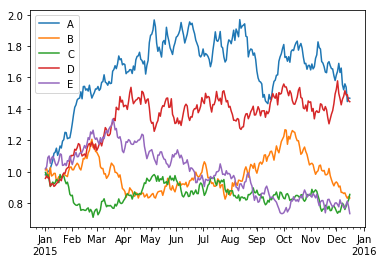

In [2]:
# Generate some data to play with
some_dates = pd.bdate_range(start=datetime(2015, 1, 1), periods=250, freq="B")
some_chg = pd.DataFrame(np.random.normal(1.0, 0.025, (250, 5)), index=some_dates, columns=list("ABCDE"))
some_px = some_chg.cumprod()
some_px.plot()

In [3]:
# View the last n data points
n = 90
print some_px[-(n+1):-1]

                   A         B         C         D         E
2015-08-12  1.968846  0.943650  0.813541  1.278003  0.920192
2015-08-13  1.914288  0.938551  0.836877  1.268742  0.922246
2015-08-14  1.927691  0.939442  0.838154  1.283628  0.905870
2015-08-17  1.933768  0.969208  0.830331  1.285648  0.891817
2015-08-18  1.942134  1.009848  0.834017  1.343997  0.932734
2015-08-19  1.862997  1.030144  0.819009  1.367472  0.936583
2015-08-20  1.858831  1.006657  0.822164  1.369634  0.980187
2015-08-21  1.731325  0.964438  0.853665  1.337103  0.991917
2015-08-24  1.767941  1.012787  0.852026  1.356129  0.967667
2015-08-25  1.781849  1.045761  0.860775  1.382212  0.927761
2015-08-26  1.777844  1.038371  0.868047  1.396286  0.907141
2015-08-27  1.741990  1.020835  0.895966  1.416845  0.860641
2015-08-28  1.755913  1.051852  0.867140  1.360681  0.816491
2015-08-31  1.714837  1.010654  0.864472  1.361720  0.844740
2015-09-01  1.640555  0.989828  0.881442  1.384390  0.833861
2015-09-02  1.596854  1.

In [4]:
# Sort data to have the newest data first
temp_df = some_px.sort_index(ascending=False)
print temp_df.head()

                   A         B         C         D         E
2015-12-16  1.467526  0.831685  0.854313  1.445656  0.732075
2015-12-15  1.469833  0.841594  0.818355  1.451792  0.777308
2015-12-14  1.446525  0.829661  0.801910  1.489686  0.811929
2015-12-11  1.538850  0.844110  0.778831  1.488691  0.790865
2015-12-10  1.559431  0.864351  0.758331  1.515638  0.766437


In [5]:
# Calc some statistics, after sorting
stats = ["last", "max", "min", "ave", "ave-2sd", "ave+2sd"]
last = temp_df.iloc[0] #Latest data
max_px = np.max(temp_df[:n], axis=0)
min_px = np.min(temp_df[:n], axis=0)
av_px = np.mean(temp_df[:n], axis=0)
sd_px = np.std(temp_df[:n], axis=0)
lr_px = av_px - 2 * sd_px
hr_px = av_px + 2 * sd_px

In [6]:
stats_df = pd.concat([last, max_px, min_px, av_px, lr_px, hr_px], axis=1)
stats_df.columns = stats
print stats_df

       last       max       min       ave   ave-2sd   ave+2sd
A  1.467526  1.942134  1.433142  1.677284  1.435962  1.918605
B  0.831685  1.267039  0.829661  1.051816  0.827612  1.276019
C  0.854313  0.895966  0.734050  0.823369  0.744889  0.901848
D  1.445656  1.578661  1.268742  1.427179  1.294828  1.559530
E  0.732075  0.991917  0.732075  0.825990  0.715398  0.936583


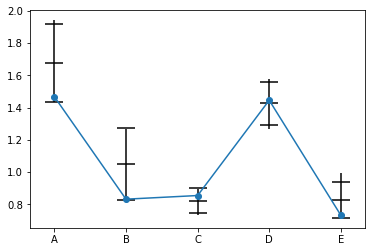

In [7]:
x_labels = list(last.index.values) #Need to convert categroical to numeric range
x_rng = range(len(x_labels))
# Create the figure
fig, ax = plt.subplots()

# Plot the last data points
ax.plot(x_rng, last.values, marker="o")

# Plot the min-max ranges
ax.vlines(x_rng, min_px, max_px)

# Plot the horizontal bars
h_width = 0.25 #Determine the width of the bars
h_elems = [av_px, lr_px, hr_px]
x_low = [x - 0.5*h_width for x in x_rng]
x_high = [x + 0.5*h_width for x in x_rng]
for elem in h_elems:
    ax.hlines(elem, x_low, x_high)

plt.xticks(x_rng, x_labels) #Remap back to numerical
plt.show()

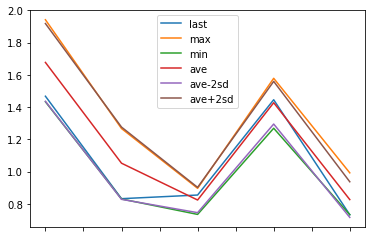

In [8]:
stats_df.plot()

# Conclusion
Having achieved the overall effect, I guess some fine tuning would be ideal to get the colours and line widths a bit nicer, lebel axes, etc. However, will probably package it up into a function of some sort so that I could use it repeatedly.